# Repetitiveness of Song Lyrics & Music Genre Classification

<img src ="https://content.thriveglobal.com/wp-content/uploads/2019/02/GettyImages-1035429740.jpg?w=1550" />

According to the psychologists, human is such a sucker of repetition. Our brains are more willing to process the information that we are already familiar with. That's why, in the music industry, song producers have to admit that repetition is the central element of music, especially in the modern music industry. In this report, let’s go and explore the interesting facts about repetitiveness of song lyrics.

In [2]:
import re
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
#from  matplotlib import pyplot
import seaborn as sns
#import seaborn as sns; sns.set()

In [3]:
file = pd.read_csv('lyrics.csv')

## Basic Data Cleaning 

In order to compare the repetitiveness of lyrics, I measure the length of unique words in each song and calculate the drop rate of lyrics size, which I called “reduction rate” in this report.

In [107]:
file = file[(file.genre != "Not Available") & (file.genre != "Other") & (file.year > 1969)]
file["lyrics"] = file.lyrics.apply(lambda x: x.lower())
file['processed_lyrics'] = file['lyrics'].map(lambda x: re.sub('[,\.!?]', '', x))
file['processed_lyrics'] = file['processed_lyrics'].str.split(r"[() \n\]]")
file['length'] = file.processed_lyrics.str.len()
file["unique"] = file.processed_lyrics.apply(set)
file['length_unique'] = file.unique.str.len()
file["reduction_rate"] =  (file["length"]- file["length_unique"]) / file["length"]
file.head()

,song,year,artist,genre,lyrics,processed_lyrics,length,unique,length_unique,reduction_rate
0,when-you-were-with-me,2009,a,Hip-Hop,i stopped by the house we called our home\nit ...,"[i, stopped, by, the, house, we, called, our, ...",107,"{inside, overgrown, the, past, got, for, a, lo...",72,0.327103
1,careless-whisper,2009,a,Hip-Hop,i feel so unsure\nas i take your hand and lead...,"[i, feel, so, unsure, as, i, take, your, hand,...",304,"{given, , i've, good, so, things, whispers, fo...",115,0.621711
2,2-59,2007,a,Hip-Hop,mark:] sunday football i got boot off the pitc...,"[mark:, , sunday, football, i, got, boot, off,...",396,"{, invest, for, i've, day, eviction, said, all...",135,0.659091
3,power-of-desire,2007,a,Hip-Hop,[chris:] fallin' for a fantasy\ni threw away m...,"[[chris:, , fallin', for, a, fantasy, i, threw...",160,"{, up, for, i've, things, chris:, all, make, k...",97,0.393750
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...,"[something, in, the, way, we, touch, you, hold...",125,"{the, hair, for, youre, baby, boy, way, so, no...",60,0.520000


## Repetition of song lyrics by year

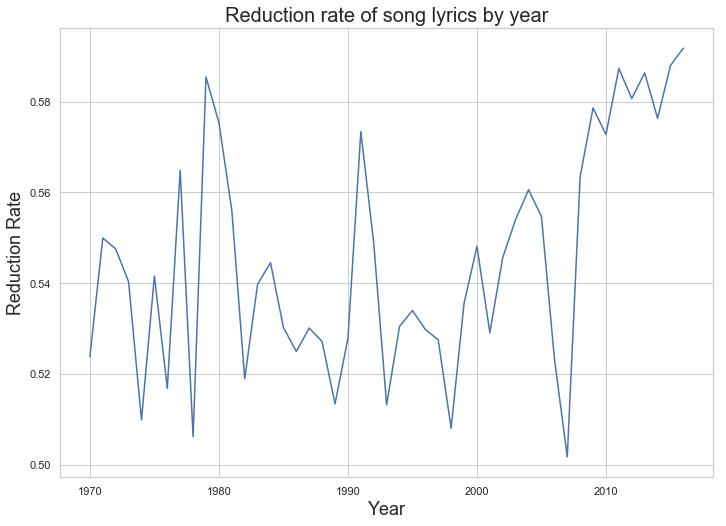

In [223]:
all_plot = file.groupby("year").reduction_rate.mean().reset_index(level='year')

sns.set(style="whitegrid")
ax = sns.lineplot(x = 'year', y = 'reduction_rate',data = all_plot)
ax.set_ylabel("Reduction Rate",size = 18)
ax.set_xlabel("Year",size = 18)
ax.set_title("Reduction rate of song lyrics by year",size = 20)
#sns.set(rc={'figure.figsize':(11.7,8.27)})
fig.set_size_inches(11.7, 8.27)


People are saying that music is getting more and more redundancy by year. However, from my data, I don't believe in this assumption. Even with the huge increase since the year 2007, all music genre redundancy seems to rise a lot, we could not deny the unexpected fluctuation between 1970 to late 20th century.It might because of the incompleteness of the database. For now, we could only say that the music we are listening to in recent years are much repetitive comparing to the ones that we were listening to when we were young.

### What if we look closely to the trend of repetion in some specific genres?

Text(0.5, 1.0, 'Reduction rate of top 3 genres by year')

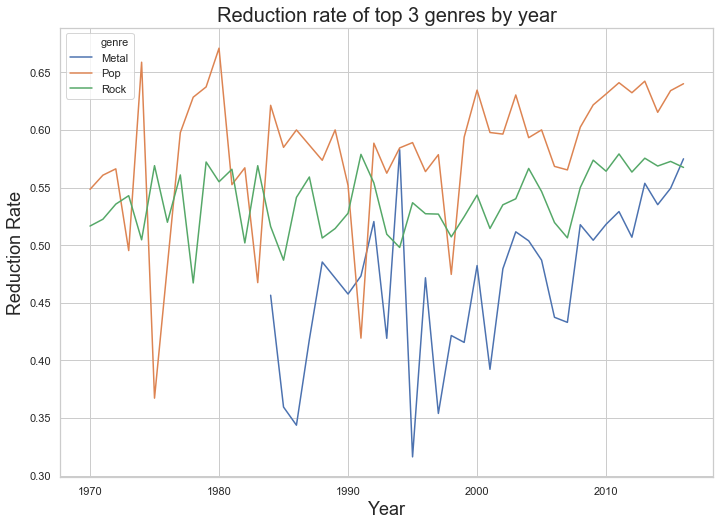

In [224]:
genre_plot = file.groupby(["genre","year"]).reduction_rate.mean().reset_index(level=['genre','year'])
selected_plot = genre_plot[(genre_plot.genre == "Pop")|(genre_plot.genre == "Rock")|(genre_plot.genre == "Metal")]

ap = sns.lineplot(x = 'year', y = 'reduction_rate',data = selected_plot,hue = 'genre')
ap.set_ylabel("Reduction Rate",size = 18)
ap.set_xlabel("Year",size = 18)
ap.set_title("Reduction rate of top 3 genres by year",size = 20)

To explore the repetition trends in different music genres, I look through the top 3 genres with the greatest number of songs included in this dataset, which are Rock, Pop and Metal music. Due to the incompleteness of the dataset, in 1975, only several songs of a single artist, Gino Vannelli exists which are classified as pop music. Except these abnormal reduction rates, we could see the noticeable differences of the average reduction rate between 3 genres.

## Lyrics reduction rate by music genre  

Text(0.5, 0, 'Genre')

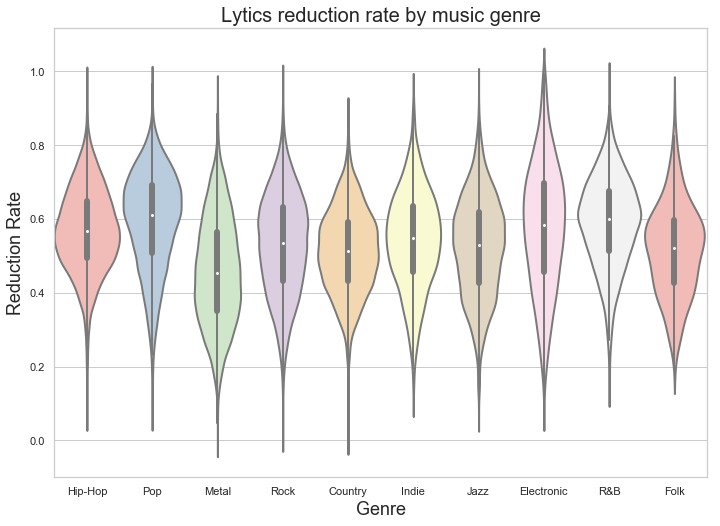

In [225]:
kk = sns.violinplot(x = "genre", y = "reduction_rate", data = file, 
                    linewidth=2, palette="Pastel1",width = 1)

kk.set_title("Lytics reduction rate by music genre",size = 20)
kk.set_ylabel("Reduction Rate",size = 18)
kk.set_xlabel("Genre",size = 18)

Based on this finding, I started to explore the repetition characteristics from all music genres. From this violin plot, we could observe that on average, Pop music has the most repetitive vocabularies and Metal get the least. It is quite easy to interpret in the way that in order to make the song appealing or catch listeners’ ears, the cathy hook with repetitve sentence are necessary in music genres like Hip-pop, Rock, R&B, and Pop, which results in the high reduction rate. On the other hand, the styles of Metal or Jazz are less predictable. From melody perspective, Metal is more chaos, and the lyrics are more critical, which requires more vocabularies to convey the topics.

## Repetitiveness per artist

In [226]:
# data cleaning of specific artitsts
file['artist'] = file['artist'].str.replace('eminem-d12', 'eminem')
file['artist'] = file['artist'].str.replace('beyonce-knowles', 'beyonce')

In [437]:
artist_list = file[file['artist'].
                   str.contains('ed-sheeran|beyonce|ariana-grande|avril-lavigne|christina-aguilera|ellie-goulding|coldplay|eminem|celine-dion|adam-levine|chris-brown|ac-dc|fall-out-boy|duke-ellington|carrie-underwood|dolly-parton',regex = True)]

artist_sum = pd.DataFrame(artist_list.groupby(["artist","genre"])['reduction_rate'].mean())
artist_sum = artist_sum.reset_index(level=['artist','genre'])

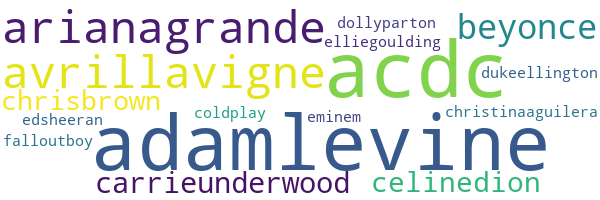

In [439]:
from wordcloud import WordCloud
long_string = ','.join(list(artist_sum['artist'].values)).replace("-","")

# Generate a word cloud
wordcloud = WordCloud(background_color = "white",width = 600, height = 200,contour_color='steelblue').generate(long_string)
wordcloud.to_image()

In [293]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

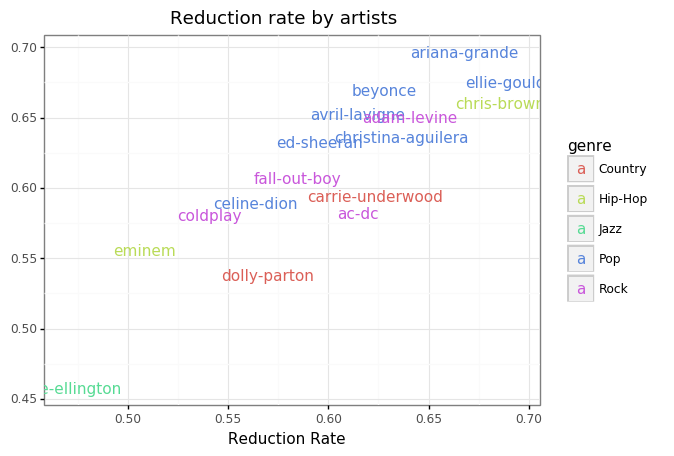

<ggplot: (-9223372029092829966)>

In [431]:
(ggplot(artist_sum)
 + aes(x = 'reduction_rate', y = "reduction_rate", color = 'genre',label = "artist")
 + labs(title = 'Reduction rate by artists', x = ' Reduction Rate', y ='')
 + geom_text(position = position_jitter(0.05))
 + theme_bw()
)

In [435]:
adam = file[file.artist == "adam-levine"]
print(adam.lyrics[2268][757:])

god, tell us the reason youth is wasted on the young
it's hunting season and the lambs are on the run
searching for meaning
but are we all lost stars, trying to light up the dark?
i thought i saw you out there crying
i thought i heard you call my name
i thought i heard you out there crying
just the same
god, give us the reason youth is wasted on the young
it's hunting season and this lamb is on the run
searching for meaning
but are we all lost stars, trying to light up the dark?
i thought i saw you out there crying
i thought i heard you call my name
i thought i heard you out there crying
but are we all lost stars, trying to light up the dark?
but are we all lost stars, trying to light up the dark?


In this graph, I plotted the average reduction rate of each artist. Most of the artists’ discographies conform to the characteristics of lyrics repetition rate of each genre. Pop music artists, with high reduction rate, gather on the top right corner; Duke Ellington, representing jazz, and country music ambassador Dolly Parton are positioning on the bottom left.
One of the interesting findings is that with even with reduction rate of 0.64, Adam Levine’s songs are still considered as Rock. Diving deep into the data, I spotted “Lost Star”, which is a really repetitive song. According to Wiki, this is absolutely a pop music.
Adam Levine is the lead vocalist of rock band Maroon 5, which might be the main reason of sorting his music as rock. But I think the identiy of the singer shouldn't be the only criterion to classify the works. Based on this finding, I am wondering whether repetitiveness would help the music industry to improve music genre classification?

## Summary

By analyzing the repetitiveness of song lyrics, we could get the following results.
    
   * On average, pop music is most likely to contain repetitive vocabularies and sentences in the lyrics. Other music genres like Jazz, Country and Metal normally have lower repetitiveness.
     
   * We know the music classification should be based on both audio and lyrics. In the study of lyrics repetitiveness, we could see the potential of lyrics contribution to music classification even from very shallow textual features. With further study that will reach the semantics level of analysis, we could gain more information that benefits music recommendation system.

## Reference 

1. Mayo Oshin. The science of how music affects your productivity. https://thriveglobal.com/stories/why-music-can-make-you-more-productive/
2. Colin Morris. Are Pop Lyrics Getting More Repetivie? https://pudding.cool/2017/05/song-repetition/
3. Michael Fell, Caroline Sporleder. Lyrics-based Analysis and Classification of Music.